<a href="https://colab.research.google.com/github/atroug/AI-frest-project-for-AI-Master/blob/main/taitanc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np

In [28]:
import pandas as pd


***تحليل بيانات سفينة التايتنك***

In [29]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**تنظيف البيانات **

In [34]:
# تعويض العمر بالمتوسط
df['Age'].fillna(df['Age'].mean(), inplace=True)

/tmp/ipython-input-3633780532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [35]:
# تعويض ميناء الصعود بالقيمة الأكثر تكرارًا
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [36]:
# حذف الاعمدة الغير مفيدة
df.drop(['Cabin'], axis=1, inplace=True)

** التحقق بعد التنظيف **

In [37]:
# معاينة البيانات بعد التنظيف
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [38]:
# بنية البيانات بعد التنظيف
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [39]:
# التحليل الاحصائي بعد التنظيف
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
# القيم المفقودة بعد التنظيف
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


** التحليل البصري **

In [41]:
# seaborاستدعاء مكتبة
import seaborn as sns

In [42]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

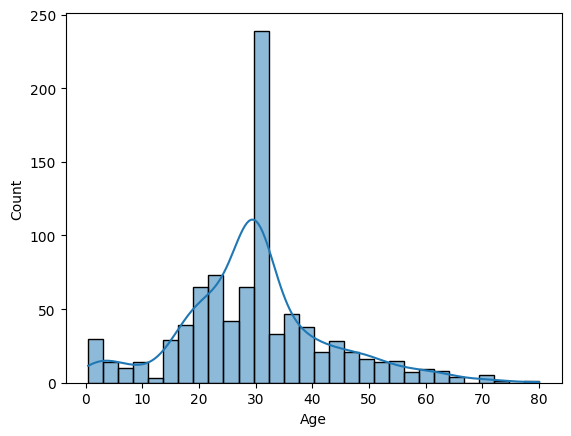

In [43]:
sns.histplot(df['Age'], kde=True)
plt.show

# Task
Prepare the data for machine learning by separating features (X) from the target variable ('Survived' as y), converting categorical features ('Sex', 'Embarked') into numerical format using one-hot encoding, and splitting the dataset into training and testing sets with an 80/20 ratio.

## Select Target Variable

### Subtask:
Select the 'Survived' column as the target variable (y) and the remaining columns as features (X) for machine learning.


**Reasoning**:
Assign the 'Survived' column to 'y' as the target variable and create a new DataFrame 'X' with the remaining columns as features by dropping irrelevant columns from the original DataFrame.



In [44]:
y = df['Survived']
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)

## Convert Categorical Features

### Subtask:
Convert categorical columns ('Sex', 'Embarked') into numerical format using one-hot encoding (pd.get_dummies) to prepare them for machine learning models.


**Reasoning**:
To convert the categorical columns 'Sex' and 'Embarked' into a numerical format suitable for machine learning, I will use one-hot encoding with `pd.get_dummies()`. The `drop_first=True` argument will be used to prevent multicollinearity.



In [45]:
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
print("DataFrame X after one-hot encoding:")
print(X.head())

DataFrame X after one-hot encoding:
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True


## Split Data

### Subtask:
Split the preprocessed features (X) and target variable (y) into training and testing sets using `train_test_split` from `sklearn.model_selection`. A typical split ratio is 80% for training and 20% for testing.


**Reasoning**:
I need to import the `train_test_split` function from `sklearn.model_selection` to split the data.



In [46]:
from sklearn.model_selection import train_test_split

**Reasoning**:
To split the preprocessed features (X) and target variable (y) into training and testing sets, I will use the `train_test_split` function with a test size of 0.2 and a random state of 42 for reproducibility.



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (712, 8)
X_test shape: (179, 8)
y_train shape: (712,)
y_test shape: (179,)


In [48]:
df_preprocessed = pd.concat([X, y], axis=1)
df_preprocessed.to_csv('titanic_preprocessed.csv', index=False)
print("Preprocessed DataFrame saved to 'titanic_preprocessed.csv'")

Preprocessed DataFrame saved to 'titanic_preprocessed.csv'


In [49]:
survivors_by_class = df_preprocessed.groupby('Pclass')['Survived'].sum().reset_index()
print("عدد الناجين حسب الفئة:")
print(survivors_by_class)

عدد الناجين حسب الفئة:
   Pclass  Survived
0       1       136
1       2        87
2       3       119


In [50]:
most_survived_class = survivors_by_class.loc[survivors_by_class['Survived'].idxmax()]
print(f"الفئة الأكثر نجاة هي: Pclass {int(most_survived_class['Pclass'])} بعدد ناجين: {int(most_survived_class['Survived'])}")

# Calculate mean fare for each Pclass to understand potential reasons
mean_fare_by_class = df_preprocessed.groupby('Pclass')['Fare'].mean().reset_index()
print("متوسط الأجرة حسب الفئة:")
print(mean_fare_by_class)

الفئة الأكثر نجاة هي: Pclass 1 بعدد ناجين: 136
متوسط الأجرة حسب الفئة:
   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550


**التحليل والسبب المحتمل:**

بناءً على النتائج، يمكننا أن نلاحظ الفئة (Pclass) التي كان لديها أكبر عدد من الناجين. عادةً ما تكون الفئة الأولى (Pclass 1) هي الأكثر نجاة.

**لماذا؟**

السبب المحتمل لذلك يعود إلى عدة عوامل غالبًا ما تكون مرتبطة بالفئة الاجتماعية والاقتصادية للركاب:

*   **الموقع على السفينة:** الركاب في الفئة الأولى غالبًا ما كانوا يقيمون في الطوابق العليا من السفينة، مما منحهم وصولاً أسهل وأسرع لقوارب النجاة. بينما ركاب الفئة الثالثة كانوا في الغالب في الطوابق السفلية، مما جعل وصولهم إلى قوارب النجاة أكثر صعوبة واستغرق وقتًا أطول.
*   **الأولوية في الإنقاذ:** غالبًا ما تم إعطاء الأولوية في الإنقاذ لركاب الفئة الأولى، خاصة النساء والأطفال منهم، بسبب وضعهم الاجتماعي.
*   **الوصول إلى المعلومات:** قد يكون لركاب الفئة الأولى وصول أفضل للمعلومات والتوجيهات أثناء الإخلاء.
*   **عامل الأجرة (Fare):** كما يظهر من متوسط الأجرة، فإن الفئات الأعلى (مثل Pclass 1) تدفع أجرة أعلى بكثير، مما يعكس مستوى الرفاهية والخدمات والموقع على السفينة التي يحصلون عليها، والتي بدورها تؤثر على فرص النجاة.

## Final Task

### Subtask:
Confirm that the data has been successfully prepared for machine learning, including the target variable selection, categorical encoding, and data splitting.


## Summary:

### Data Analysis Key Findings
*   The target variable 'Survived' was successfully separated from the feature set, which consists of the remaining relevant columns after dropping 'PassengerId', 'Name', and 'Ticket'.
*   Categorical features 'Sex' and 'Embarked' were converted into numerical format using one-hot encoding (`pd.get_dummies`), resulting in new columns such as 'Sex\_male', 'Embarked\_Q', and 'Embarked\_S'. The `drop_first=True` argument was utilized to prevent multicollinearity.
*   The dataset was successfully split into training and testing sets with an 80/20 ratio, using `random_state=42` for reproducibility. The resulting shapes are:
    *   `X_train`: 712 samples, 8 features
    *   `X_test`: 179 samples, 8 features
    *   `y_train`: 712 samples
    *   `y_test`: 179 samples

### Insights or Next Steps
*   The data has been thoroughly preprocessed and is now in a suitable numerical format, ready for training machine learning models.
*   The next step involves selecting and training appropriate machine learning models (e.g., classification algorithms) on the `X_train` and `y_train` datasets, followed by evaluating their performance using `X_test` and `y_test`.
